# Further Cleaning & Exploratory Analysis
In between this notebook, and the first, I cleaned the data further in Excel since the dataset was small enough to begin with. The resulting dataset lists 56 separate alleged hate crimes, in Austin, TX, since 2017. Out of the total number of reported, alleged incidents, 32.14% were directed at the LGBT Community. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [27]:
# Importing the cleaned dataset
df = pd.read_csv(r"C:\Users\Robert\OneDrive\Desktop\aus_final_clean.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 9 columns):
date                            56 non-null object
bias                            56 non-null object
number_of_offenders_over_18     56 non-null int64
number_of_offenders_under_18    56 non-null int64
number_of_victims_over_18       56 non-null int64
number_of_victims_under_18      56 non-null int64
offense                         56 non-null object
offense_location                56 non-null object
offender_ethnicity              56 non-null object
dtypes: int64(4), object(5)
memory usage: 4.0+ KB
None


## Make the 'date' column into the index & convert non-numerical data columns into categorical data.

In [28]:
# Performing the necessary conversions then displaying the new dataframe
df['date'] = df['date'].astype('datetime64')
df = df.set_index('date')
df['bias'] = df['bias'].astype('category')
df['offense'] = df['offense'].astype('category')
df['offense_location'] = df['offense_location'].astype('category')
df['offender_ethnicity'] = df['offender_ethnicity'].astype('category')
print(df.info())
print('----------------------------------')
print(df.index)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56 entries, 2017-01-01 to 2020-05-20
Data columns (total 8 columns):
bias                            56 non-null category
number_of_offenders_over_18     56 non-null int64
number_of_offenders_under_18    56 non-null int64
number_of_victims_over_18       56 non-null int64
number_of_victims_under_18      56 non-null int64
offense                         56 non-null category
offense_location                56 non-null category
offender_ethnicity              56 non-null category
dtypes: category(4), int64(4)
memory usage: 4.5 KB
None
----------------------------------
DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-21', '2017-04-12',
               '2017-05-15', '2017-06-04', '2017-06-15', '2017-06-17',
               '2017-07-01', '2017-07-05', '2017-07-20', '2017-07-21',
               '2017-10-15', '2017-10-24', '2017-11-10', '2017-11-16',
               '2017-11-26', '2018-01-19', '2018-01-25', '2018-02-08',
               '2018

In [26]:
vals = df.values
print(vals)

[['Anti-African American' 1 0 1 0 'Aggravated Assault' 'Park/Playground'
  'Caucasian']
 ['Anti-Caucasian' 1 0 1 0 'Aggravated Assault'
  'Highway/Road/Alley/Street/Sidewalk' 'African American']
 ['Anti-Jewish' 0 0 0 0 'Destruction'
  'Highway/Road/Alley/Street/Sidewalk' 'Unknown']
 ['Anti-Jewish' 0 0 0 0 'Simple Assault' 'Air/Bus/Train Terminal'
  'Caucasian']
 ['Anti-LGBT' 2 1 0 1 'Simple Assault' 'Residence/Home' 'Caucasian']
 ['Anti-LGBT' 2 0 1 0 'Simple Assault'
  'Highway/Road/Alley/Street/Sidewalk' 'Caucasian']
 ['Anti-Hispanic' 1 0 1 0 'Intimidation' 'Bank/Savings and Loan'
  'Caucasian']
 ['Anti-African American' 1 0 1 0 'Simple Assault'
  'Highway/Road/Alley/Street/Sidewalk' 'Caucasian']
 ['Anti-African American' 1 0 1 0 'Simple Assault'
  'Highway/Road/Alley/Street/Sidewalk' 'Unknown']
 ['Anti-African American' 1 0 1 0 'Intimidation' 'Residence/Home'
  'Unknown']
 ['Anti-LGBT' 1 0 1 0 'Robbery' 'Residence/Home' 'Unknown']
 ['Anti-LGBT' 1 0 1 0 'Destruction' 'Residence/Home' 

We'll look at the numerical data in the victims & offenders columns later. First, I want to explore the categorical data.

## Question 1. How are reported incidences in Austin distributed according to motivation? 

In [29]:
print(df.number_of_victims_under_18.sum())
print(df.number_of_victims_over_18.sum())
print('----------------------------------')
print('Total # of victims = 54')

3
51
----------------------------------
Total # of victims = 54


Anti-LGBT                18
Anti-African American    18
Anti-Hispanic             7
Anti-Muslim               4
Anti-Jewish               4
Anti-Caucasian            3
Anti-Disability           1
Anti-Buddhist             1
Name: bias, dtype: int64
----------------------------------
Total number of reported hate crimes since 2017 = 56


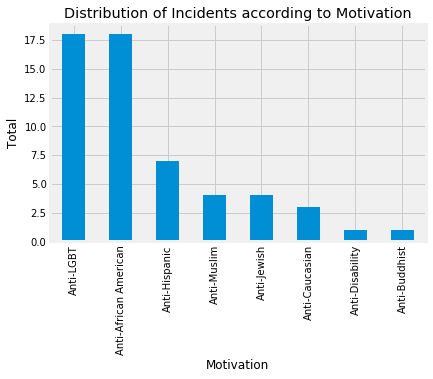

In [32]:
bias = df.bias.value_counts()
print(bias)
print('----------------------------------')
print('Total number of reported hate crimes since 2017 = 56')

bias.plot.bar()
plt.xlabel('Motivation')
plt.ylabel('Total')
plt.title('Distribution of Incidents according to Motivation')
plt.show()

## Question 2. How are the offense-types distributed? 

Assault                21
Simple Assault          8
Intimidation            7
Criminal Mischief       5
Vandalism               4
Aggravated Assault      3
Destruction             2
Theft                   1
Robbery                 1
Burglary/Assault        1
Assault with Injury     1
Assault by Threat       1
Assault by Contact      1
Name: offense, dtype: int64

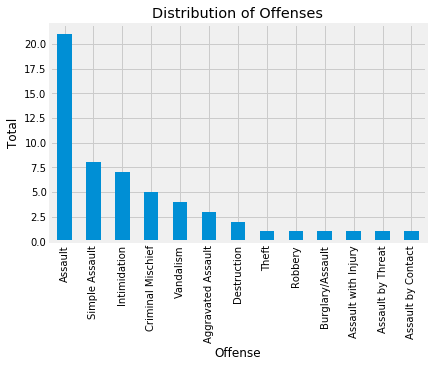

In [6]:
offense_count = df.offense.value_counts()
display(offense_count)
offense_count.plot.bar()
plt.xlabel('Offense')
plt.ylabel('Total')
plt.title('Distribution of Offenses')
plt.show()

## Question 3. How are the alleged offenders distributed according to race? 
    1. 43.75% were White
    2. 21.88% were Hispanic
    3. 7.81% were African American
    4. 1.56% were Asian (only 1 offender was recorded as Asian)

The remaining offenders in the dataset are unknown in terms of race/ethnicity.     

In [34]:
print(df.number_of_offenders_under_18.sum())
print(df.number_of_offenders_over_18.sum())
print('----------------------------------')
print('Total # of offenders = 64')

7
57
----------------------------------
Total # of offenders = 64


Caucasian                    26
Hispanic                     12
Unknown                      11
African American              5
Hispanic (2) Caucasian(2)     1
Asian                         1
Name: offender_ethnicity, dtype: int64


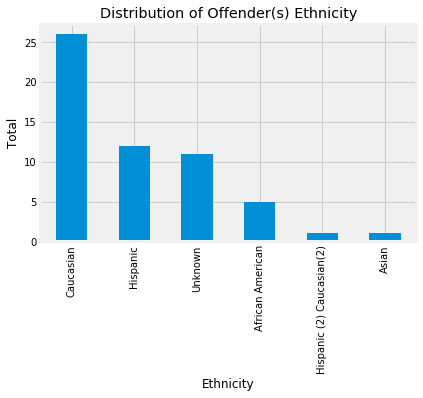

In [35]:
offenders_count = df['offender_ethnicity'].value_counts()
print(offenders_count)
offenders_count.plot.bar()
plt.xlabel('Ethnicity')
plt.ylabel('Total')
plt.title('Distribution of Offender(s) Ethnicity')
plt.show()

Note...the above 'Offender' graph has an instance of 'Hispanic (2), Caucasian (2)' as a single column because of an incident that occurred on 1/19/19 https://www.statesman.com/news/20200124/confrontation-that-ignited-attack-on-austin-gay-couple-questioned-by-detective -- 2 of the offenders were white, and the other 2 were hispanic. 